# 🧪 Lab 10: Naive Bayes Classification with Global Earthquake Data

**Objective**: Use Naive Bayes to classify earthquakes into magnitude categories based on seismic and geographic features.

**Dataset**: Significant Earthquakes from USGS via Kaggle  
Link: https://www.kaggle.com/datasets/usgs/earthquake-database

**Theory**:
- Naive Bayes is a probabilistic classifier based on Bayes’ Theorem.
- It assumes feature independence and calculates the probability of each class given the input features.
- Despite its simplicity, it performs well on many real-world problems.
- It’s especially useful when features are categorical or normally distributed.

In [1]:
# 📦 Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 📥 Step 2: Load the dataset
This dataset includes earthquake magnitude, depth, location, and time.

In [2]:
# Load the dataset
df = pd.read_csv("database.csv")
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## 🧠 Step 3: Create magnitude categories
We'll classify earthquakes into three categories:
- Minor: < 5.0
- Moderate: 5.0–6.9
- Major: ≥ 7.0

In [3]:
# Clean and categorize magnitude
df['Magnitude'] = pd.to_numeric(df['Magnitude'], errors='coerce')
df = df.dropna(subset=['Magnitude', 'Depth'])

def categorize_mag(mag):
    if mag < 5.0:
        return 'Minor'
    elif mag < 7.0:
        return 'Moderate'
    else:
        return 'Major'

df['Mag_Category'] = df['Magnitude'].apply(categorize_mag)
df['Mag_Label'] = df['Mag_Category'].map({'Minor': 0, 'Moderate': 1, 'Major': 2})

## 🧹 Step 4: Preprocess the data
We select relevant features and scale them for Naive Bayes.

In [4]:
# Select features
features = ['Depth', 'Latitude', 'Longitude']
X = df[features]
y = df['Mag_Label']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 🧪 Step 5: Train the Naive Bayes classifier
We use GaussianNB since our features are continuous and normally distributed.

In [5]:
# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict
y_pred = nb.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9634849455477258

Classification Report:
               precision    recall  f1-score   support

           1       0.97      1.00      0.98      4531
           2       0.09      0.01      0.02       152

    accuracy                           0.96      4683
   macro avg       0.53      0.50      0.50      4683
weighted avg       0.94      0.96      0.95      4683



## 📊 Step 6: Visualize the confusion matrix
This shows how well the model distinguishes between magnitude categories.

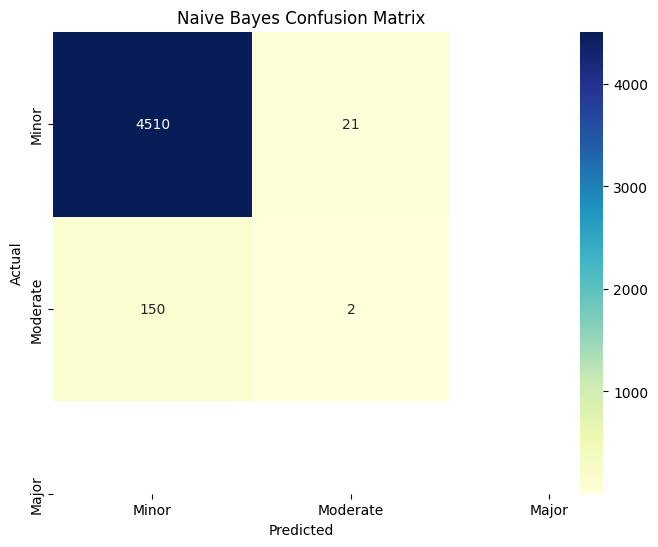

In [6]:
# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Minor','Moderate','Major'], yticklabels=['Minor','Moderate','Major'])
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 📝 Reflection Questions

1. Why is Naive Bayes suitable for this classification task?
2. What assumptions does Naive Bayes make about the features?
3. How could this model be used in real-time earthquake alert systems?
4. What are the limitations of using only depth and location for magnitude prediction?